# Importing libraries

In [67]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plots to appear in the notebook
%matplotlib inline

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score

## Importing dataset

In [2]:
df = pd.read_csv('clients.csv')

In [3]:
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


In [4]:
df.tail()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
1718,12,18500,6,32,male,Higher education,Cell phones,1,2,46000,Another,1,1,0
1719,12,6500,6,24,male,Secondary special education,Cell phones,0,2,18000,Another,0,1,0
1720,12,5500,12,21,male,Incomplete higher education,Cell phones,0,2,15000,Another,1,1,0
1721,12,30500,10,25,female,Incomplete higher education,Cell phones,0,2,41000,Another,2,1,1
1722,12,116000,24,34,male,Higher education,Clothing,1,2,41000,Another,2,0,0


In [5]:
df.shape

(1723, 14)

## Perform EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [7]:
print(df.sex.nunique(), df.education.nunique(), df.product_type.nunique(), df.region.nunique(), df.family_status.nunique())

2 6 22 3 3


### We should care about sex, education, region and family_status columns and deal with them with label encoding and one hot encoding

In [8]:
df.describe()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,bad_client_target
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,0.428323,1.681370,32652.350551,1.125363,0.604759,0.113755
std,3.538420,27926.778301,6.548354,13.120203,0.494979,0.704256,20913.193158,1.015822,0.489044,0.317606
min,1.000000,5000.000000,3.000000,18.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,0.000000,2.000000,21000.000000,0.000000,0.000000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,0.000000,2.000000,27000.000000,1.000000,1.000000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,1.000000,2.000000,38000.000000,2.000000,1.000000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,1.000000,2.000000,401000.000000,4.000000,1.000000,1.000000


In [9]:
df.corr()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,bad_client_target
month,1.000000,0.044120,0.032481,0.018633,-0.019083,0.016949,0.064720,0.006149,-0.033494,0.019749
credit_amount,0.044120,1.000000,0.497040,0.122815,-0.034966,-0.162979,0.372995,-0.010177,0.034430,-0.014035
credit_term,0.032481,0.497040,1.000000,0.051398,-0.012807,0.004804,0.027781,-0.028206,0.028890,0.074508
age,0.018633,0.122815,0.051398,1.000000,0.167495,-0.016368,-0.069791,-0.022219,0.004066,-0.102110
having_children_flg,-0.019083,-0.034966,-0.012807,0.167495,1.000000,0.093539,-0.019715,0.029431,-0.082315,-0.062617
region,0.016949,-0.162979,0.004804,-0.016368,0.093539,1.000000,-0.315821,-0.014754,0.032058,0.042712
income,0.064720,0.372995,0.027781,-0.069791,-0.019715,-0.315821,1.000000,-0.001255,-0.112127,-0.056292
phone_operator,0.006149,-0.010177,-0.028206,-0.022219,0.029431,-0.014754,-0.001255,1.000000,0.002773,-0.031627
is_client,-0.033494,0.034430,0.028890,0.004066,-0.082315,0.032058,-0.112127,0.002773,1.000000,0.098955
bad_client_target,0.019749,-0.014035,0.074508,-0.102110,-0.062617,0.042712,-0.056292,-0.031627,0.098955,1.000000


Text(0.5, 1.0, 'Correlation between independents variables')

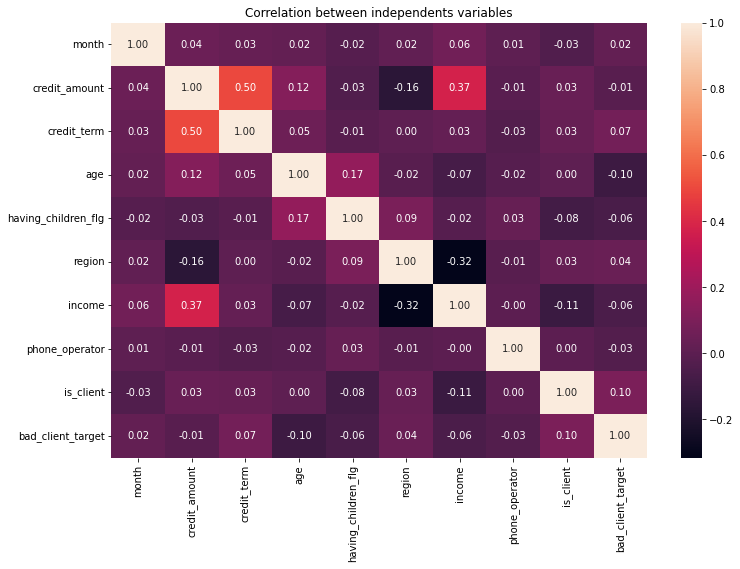

In [10]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.title("Correlation between independents variables")

## Lets see visual relation between variables

In [11]:
# (1) => Bad client, (0) => Not bad client
df.bad_client_target.value_counts()

0    1527
1     196
Name: bad_client_target, dtype: int64

In [12]:
df.bad_client_target.value_counts(normalize = True)

0    0.886245
1    0.113755
Name: bad_client_target, dtype: float64

In [13]:
# def plot(data, column_name, plot_name, color):
#     # plt.xticks(rotation = 0)
#     plt.xlabel(column_name)
#     return data[column_name].value_counts().plot(kind = plot_name, color = color)

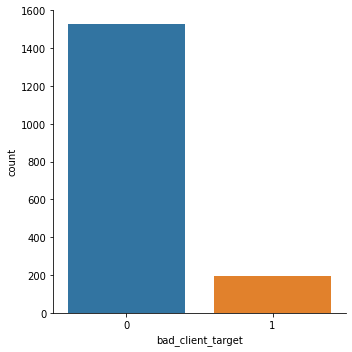

In [14]:
sns.catplot(data = df, x = 'bad_client_target', kind = "count")

In [15]:
df.sex.value_counts(normalize = True)

male      0.540337
female    0.459663
Name: sex, dtype: float64

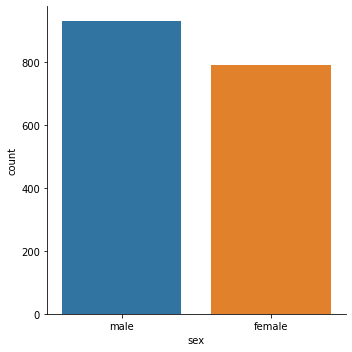

In [16]:
sns.catplot(data = df, x = 'sex', kind = "count")

In [17]:
pd.crosstab(df.sex, df.bad_client_target)

bad_client_target,0,1
sex,,
female,676,116
male,851,80


In [18]:
pd.crosstab(df.sex, df.bad_client_target, normalize = True)

bad_client_target,0,1
sex,,
female,0.392339,0.067324
male,0.493906,0.046431


Text(0, 0.5, 'Frequency')

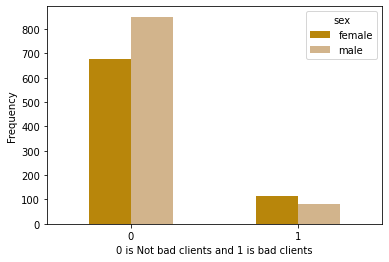

In [19]:
pd.crosstab(df.bad_client_target, df.sex).plot.bar(color = ["darkgoldenrod", "tan"])
plt.xticks(rotation = 0)
plt.xlabel("0 is Not bad clients and 1 is bad clients")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Age distribution')

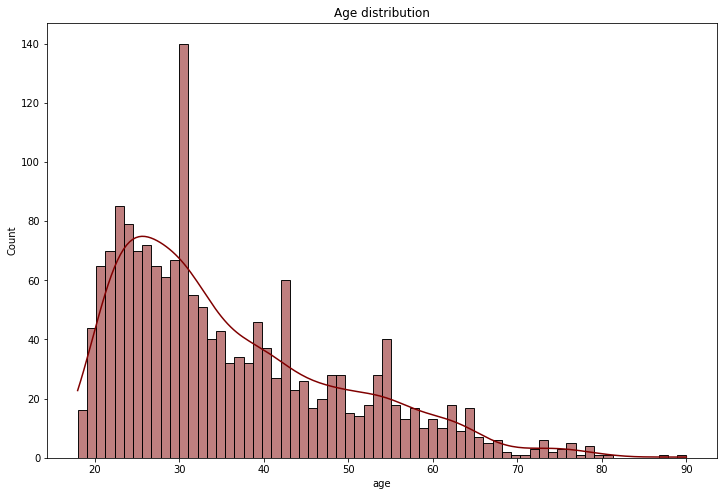

In [20]:
plt.figure(figsize = (12, 8))
sns.histplot(df, x = "age", bins = df.age.nunique(), color = "maroon", kde = True)
plt.title("Age distribution")

<AxesSubplot:title={'center':'Credit amount distribution'}, xlabel='credit_amount', ylabel='Count'>

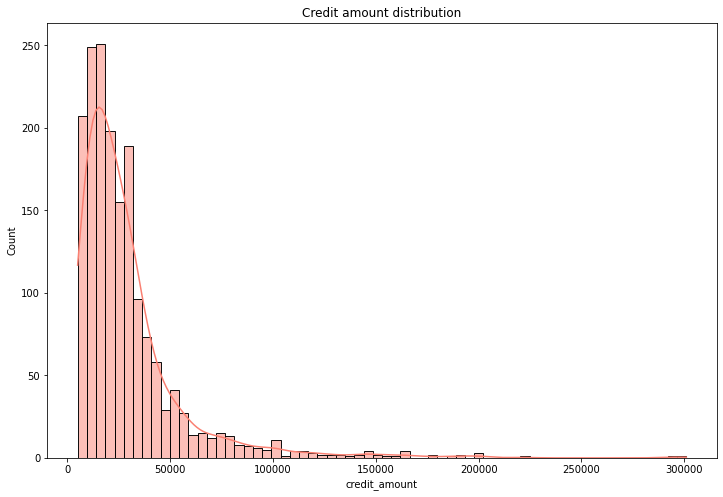

In [21]:
plt.figure(figsize = (12, 8))
plt.title("Credit amount distribution")
sns.histplot(df, x = "credit_amount", bins = df.age.nunique(), color = "salmon", kde = True)

## Models implementation

In [22]:
X = df.drop(["bad_client_target", "product_type", "month"], axis = 1)
y = df.bad_client_target.values

In [23]:
X.shape

(1723, 11)

In [24]:
y.shape

(1723,)

## Training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1292, 11)
(431, 11)
(1292,)
(431,)


In [27]:
model_results = { }

In [28]:
X.dtypes

credit_amount           int64
credit_term             int64
age                     int64
sex                    object
education              object
having_children_flg     int64
region                  int64
income                  int64
family_status          object
phone_operator          int64
is_client               int64
dtype: object

In [29]:
categorical_features = list(X.columns[X.dtypes == 'object'])
numerical_features = list(X.columns[X.dtypes == 'int64'])
transformers = [
    ("onehot", OneHotEncoder(), categorical_features),
    ("sc", StandardScaler(copy=False), numerical_features)
]
col_transform = ColumnTransformer(transformers, remainder="passthrough")

X_train_transformed = col_transform.fit_transform(X_train)
X_test_transformed = col_transform.fit_transform(X_test)
X_scaled = col_transform.fit_transform(X)

## Logistic Regression

In [30]:
logreg = LogisticRegression()
pipeline = make_pipeline(col_transform, logreg)
pipeline.fit(X_train, y_train)
model_results["LogisticRegression"] = pipeline.score(X_test, y_test)

## KNN


In [31]:
knn = KNeighborsClassifier()
pipeline = make_pipeline(col_transform, knn)
pipeline.fit(X_train, y_train)
model_results["KNN"] = pipeline.score(X_test, y_test)

## Naive Bayes

In [32]:
nb = GaussianNB()
pipeline = make_pipeline(col_transform, nb)
pipeline.fit(X_train, y_train)
model_results["GaussianNB"] = pipeline.score(X_test, y_test)

## SVM

In [33]:
svc = SVC()
pipeline = make_pipeline(col_transform, svc)
pipeline.fit(X_train, y_train)
model_results["SVC"] = pipeline.score(X_test, y_test)

## Random Forest Classifier

In [68]:
rfc = RandomForestClassifier()
pipeline = make_pipeline(col_transform, rfc)
pipeline.fit(X_train, y_train)
model_results["Random Forest"] = pipeline.score(X_test, y_test)

In [69]:
model_results

{'LogisticRegression': 0.9002320185614849,
 'KNN': 0.8747099767981439,
 'GaussianNB': 0.16473317865429235,
 'SVC': 0.9002320185614849,
 'Random Forest': 0.8955916473317865}

## Model comparison

Text(0, 0.5, 'Accuracy out of 1')

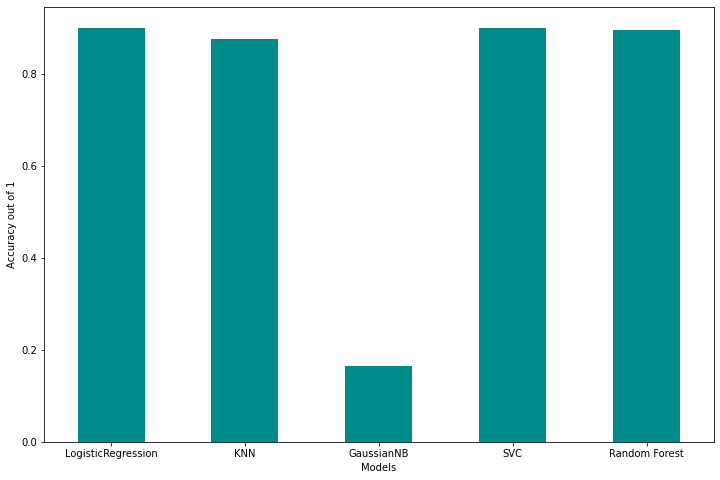

In [70]:
model_compare = pd.DataFrame(model_results, index = ["accuracy"])
model_compare.T.plot(kind = "bar", color = "darkcyan", figsize = (12, 8), legend = False)
plt.xticks(rotation = 0)
plt.xlabel("Models")
plt.ylabel("Accuracy out of 1")

## Hyperparameter tuning and cross-validation with GridSearchCV

In [36]:
# Logistic Regression
log_reg_tuning = {"C": np.logspace(-4, 4, 20),
                  "solver": ['liblinear'],
                  "penalty": ["l1", "l2"]
                  }
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_tuning, cv = 15, verbose = True)
grid_search_log_reg.fit(X_train_transformed, y_train)

Fitting 15 folds for each of 40 candidates, totalling 600 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [37]:
print(grid_search_log_reg.best_params_)
print(grid_search_log_reg.best_score_)

{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
0.8815913748552081


In [38]:
# KNN
knn_tuning = {"n_neighbors": [i for i in range(1,30)]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid = knn_tuning, cv = 15, verbose = True)
grid_search_knn.fit(X_train_transformed, y_train)

Fitting 15 folds for each of 29 candidates, totalling 435 fits


GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             verbose=True)

In [39]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'n_neighbors': 10}
0.882348748106567


In [40]:
# Naive Bayes
nb_tuning = {"var_smoothing": np.logspace(0, -9, 100)}
grid_search_nb = GridSearchCV(GaussianNB(), param_grid = nb_tuning, cv = 15, verbose = True)
grid_search_nb.fit(X_train_transformed, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=15, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=True)

In [41]:
print(grid_search_nb.best_params_)
print(grid_search_nb.best_score_)

{'var_smoothing': 1.0}
0.8815913748552081


In [42]:
# SVM
svm_tuning = {"kernel": ['linear', 'rbf'], "C": np.logspace(1e-15, 1, 10),"gamma": np.logspace(1e-5, 10, 5)}
grid_search_svm = GridSearchCV(SVC(), param_grid = svm_tuning, cv = 10, verbose = True)
grid_search_svm.fit(X_train_transformed, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'gamma': array([1.00002303e+00, 3.16233227e+02, 1.00001151e+05, 3.16229586e+07,
       1.00000000e+10]),
                         'kernel': ['linear', 'rbf']},
             verbose=True)

In [43]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 1.0000000000000022, 'gamma': 1.0000230261160268, 'kernel': 'linear'}
0.8815861657722122


In [71]:
# Random Forest
rfc_tuning = {
    "n_estimators": [200, 300, 500],
    "max_features": ['auto', 'sqrt', 'log2'], 
    "max_depth": [4,5,6,7,8], 
    "criterion": ['gini', 'entropy']
}
grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = rfc_tuning, cv = 5, verbose = True)
grid_search_rfc.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]},
             verbose=True)

In [72]:
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
0.8823561102630869


## All of the models work really good and have accuracy around ~88%

## Confusion matrices

In [44]:
# Logistic Regression
logreg_predicted = grid_search_log_reg.predict(X_test_transformed)

In [45]:
confusion_matrix(y_test, logreg_predicted)

array([[388,   0],
       [ 43,   0]])

Text(0.5, 1.0, 'Truth table')

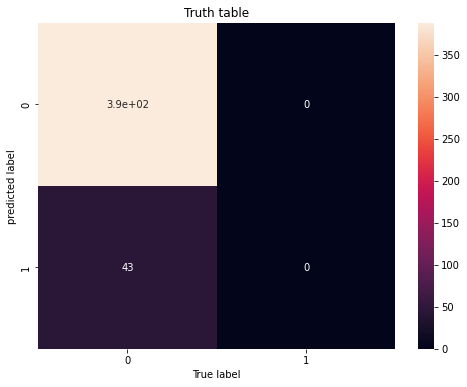

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

In [47]:
# KNN
knn_predicted = grid_search_knn.predict(X_test_transformed)

In [48]:
confusion_matrix(y_test, knn_predicted)

array([[387,   1],
       [ 43,   0]])

Text(0.5, 1.0, 'Truth table')

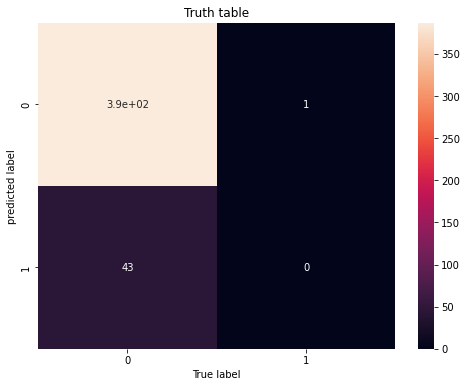

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

In [50]:
# Naive Bayes
nb_predicted = grid_search_nb.predict(X_test_transformed)

In [51]:
confusion_matrix(y_test, nb_predicted)

array([[388,   0],
       [ 43,   0]])

Text(0.5, 1.0, 'Truth table')

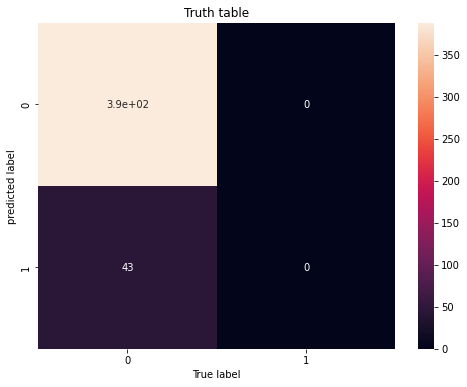

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

In [53]:
# SVC
svc_predicted = grid_search_svm.predict(X_test_transformed)

In [54]:
confusion_matrix(y_test, svc_predicted)

array([[388,   0],
       [ 43,   0]])

Text(0.5, 1.0, 'Truth table')

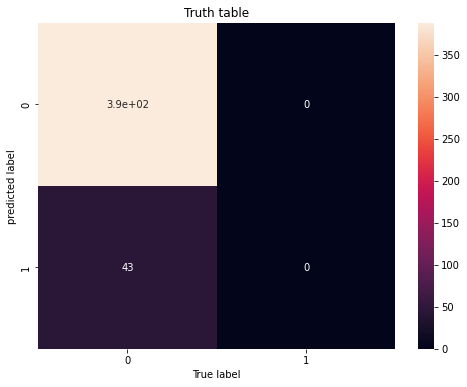

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svc_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

In [73]:
# Random Forest
rfc_predicted = grid_search_rfc.predict(X_test_transformed)


In [74]:
confusion_matrix(y_test, rfc_predicted)

array([[388,   0],
       [ 43,   0]])

Text(0.5, 1.0, 'Truth table')

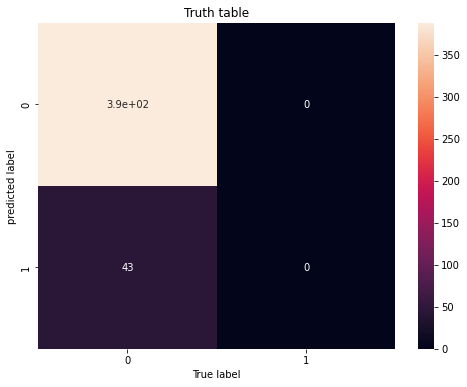

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rfc_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

## Classification Report

In [56]:
# Logistic Regression
print(classification_report(y_test, logreg_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       388
           1       0.00      0.00      0.00        43

    accuracy                           0.90       431
   macro avg       0.45      0.50      0.47       431
weighted avg       0.81      0.90      0.85       431



/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# KNN
print(classification_report(y_test, knn_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       388
           1       0.00      0.00      0.00        43

    accuracy                           0.90       431
   macro avg       0.45      0.50      0.47       431
weighted avg       0.81      0.90      0.85       431



In [58]:
# Naive Bayes
print(classification_report(y_test, nb_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       388
           1       0.00      0.00      0.00        43

    accuracy                           0.90       431
   macro avg       0.45      0.50      0.47       431
weighted avg       0.81      0.90      0.85       431



/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# SVC
print(classification_report(y_test, svc_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       388
           1       0.00      0.00      0.00        43

    accuracy                           0.90       431
   macro avg       0.45      0.50      0.47       431
weighted avg       0.81      0.90      0.85       431



/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Random Forest
print(classification_report(y_test, rfc_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       388
           1       0.00      0.00      0.00        43

    accuracy                           0.90       431
   macro avg       0.45      0.50      0.47       431
weighted avg       0.81      0.90      0.85       431



/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majid/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Personally I choose SVC to work with it

In [60]:
grid_search_log_reg.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [61]:
fitted_logreg = LogisticRegression(C=0.0001, penalty='l1', solver = 'liblinear')

In [62]:
logreg_acc = cross_val_score(fitted_logreg, X_scaled, y, cv = 15, scoring = "accuracy")
np.mean(logreg_acc)

0.8862445969997457

In [63]:
grid_search_svm.best_params_

{'C': 1.0000000000000022, 'gamma': 1.0000230261160268, 'kernel': 'linear'}

In [64]:
# Instantiating SVC with the best model
fitted_svc = SVC(C = 1.0000000000000022, kernel = 'linear', gamma = 1.0000230261160268)

In [65]:
cv_acc = cross_val_score(fitted_svc, X_scaled, y, cv = 15, scoring = 'accuracy')
cv_acc

array([0.88695652, 0.88695652, 0.88695652, 0.88695652, 0.88695652,
       0.88695652, 0.88695652, 0.88695652, 0.88695652, 0.88695652,
       0.88695652, 0.88695652, 0.87826087, 0.88596491, 0.88596491])

In [66]:
cv_acc = np.mean(cv_acc)
print(cv_acc)

0.8862445969997457


## Random Forest implementation

In [77]:
grid_search_rfc.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=200)

In [81]:
fitted_rfc = RandomForestClassifier(max_depth=6, n_estimators=200)
rfc_acc = cross_val_score(fitted_rfc, X_scaled, y, cv = 15, scoring = "accuracy")
np.mean(rfc_acc)

0.8862445969997457

In [82]:
cv_acc = cross_val_score(fitted_rfc, X_scaled, y, cv = 15, scoring = 'accuracy')
cv_acc

array([0.88695652, 0.88695652, 0.88695652, 0.88695652, 0.88695652,
       0.88695652, 0.88695652, 0.88695652, 0.88695652, 0.88695652,
       0.88695652, 0.88695652, 0.87826087, 0.88596491, 0.88596491])

In [83]:
cv_acc = np.mean(cv_acc)
print(cv_acc)

0.8862445969997457
